In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import itertools
import japanize_matplotlib

In [2]:
# グラフの設定
fontsize_title = 20
fontsize_label = 20
max_xlin = 35

# サンプリング周波数
fs_acc = 390
fs_gyro = 390
fs_pressure = 20

In [3]:
# CSVファイルを読み込む
walk_file_name = "./logs/walk_run/Pressure.csv"
elevator_file_name = "./logs/elevator/Pressure.csv"

df_walk = pd.read_csv(
    walk_file_name,
    header=0,
    names=("time", "pressure")
)

df_elevator = pd.read_csv(
    elevator_file_name,
    header=0,
    names=("time", "pressure")
)


<Figure size 640x480 with 0 Axes>

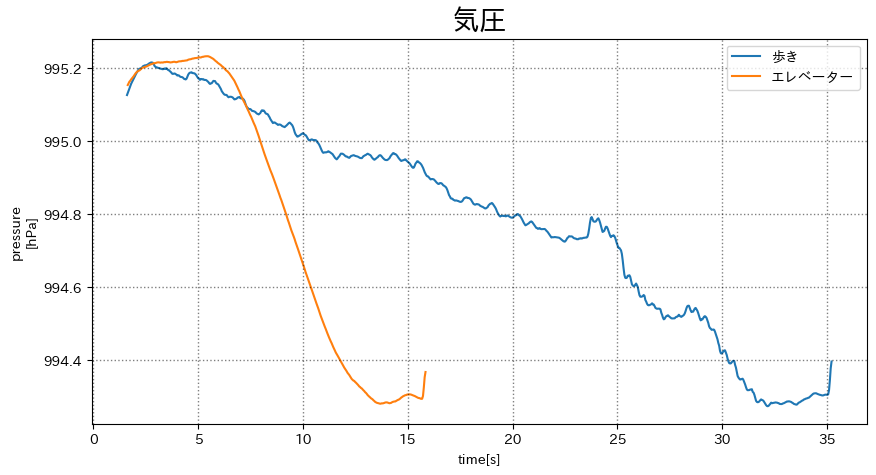

In [4]:
# 移動平均フィルターをかける
window = 40
df_walk['low'] = df_walk['pressure'].rolling(window=window).mean()
df_elevator['low'] = df_elevator['pressure'].rolling(window=window).mean()

# グラフを描画する
plt.subplots_adjust(hspace=0.3)
fig = plt.figure(figsize=(10, 5))

## 気圧
plt.plot(df_walk['time'], df_walk['low'], zorder=1, label='歩き')
plt.plot(df_elevator['time'], df_elevator['low'], zorder=1, label='エレベーター')
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.title('気圧', fontdict={'size': fontsize_title})
plt.xlabel('time[s]')
plt.ylabel('pressure\n[hPa]')
plt.legend()

plt.show()


In [5]:
def fft(df):
  df_with_out_nan = df.dropna()
  fft_result = np.fft.fft(df_with_out_nan)
  amplitudes = np.abs(fft_result)
  phases = np.angle(fft_result)

  return amplitudes, phases


<Figure size 640x480 with 0 Axes>

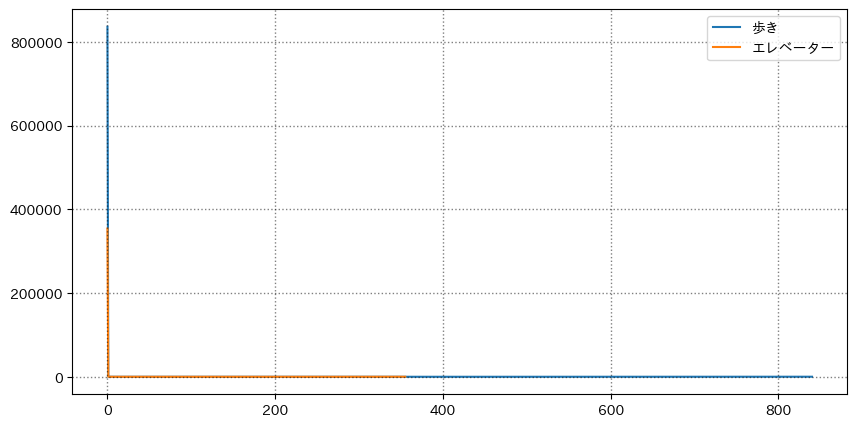

In [13]:
# グラフを描画する
plt.subplots_adjust(hspace=0.3)
fig = plt.figure(figsize=(10, 5))

amplitudes_walk, phases_walk = fft(df_walk['low'])
amplitudes_elevator, phases_elevator = fft(df_elevator['low'])

## 気圧
plt.plot(amplitudes_walk, zorder=1, label='歩き')
plt.plot(amplitudes_elevator, zorder=1, label='エレベーター')
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.legend()

plt.show()
